## Modelling Domestic Corruption Deterrence Through Self-Reporting and Collaborations


The game arises when two agents, the government bureaucrat and private entrepreneur, decide whether to play or not a strategy of corruption (cooperation), constrained by probabilities of being detected and later convicted. 
 
 Given the above conditions, let: 
 
$B$ = Bureaucrat;

$E$ = Entrepreneur;

$\pi$ = Advantage from corruption;

$b$ = Bribe; and 

$c$ = Cost of the bureaucrat for generating $\pi$,

where $\pi>0$ is the gain of the entrepreneur from corruption and $b$ is the gain of the bureaucrat, such that $0<b<\pi$. Let the enforcement variables be: 

$\alpha$ = probability of detection; and

$\beta$ = probability of conviction. 

Finally, for $i={B,E}$, let:

$S_i$ = Sanction; and 

$F$ = Fine.

For the moment, it is considered that $S_i$ is given by the gains of each player with addition of $F$ which is the same for the payer and the receiver. Consequently, $S_E = \pi +F$ and $S_B = b +F$

In order to derive the agent's decision rule, and for the sake of simplicity let,

$p_k$ = probability that $k$ happens for $k ={ \pi, F, b}$,

$p_F \equiv \alpha \beta$ and,

$p_{b} = p_{\pi} \equiv (1 - \alpha \beta)$.

Under risk neutrality, the agents' utilities $U_i$ are given by the the differences between the costs and the expected benefits for each agent:
$$U_E \equiv -b + (1-\alpha \beta) \pi - \alpha \beta F = -b + p_\pi - \pi p_F F,$$and $$U_B \equiv -c + (1-\alpha \beta) b - \alpha \beta F= -c + p_b b - p_F F.$$ 

Let us define some profitable bribery as being the fixed cost paid by agents which make their utilities at least greater than zero:

\begin{equation}
	b >  p_\pi \pi-  p_F F,
\label{profE}
\end{equation}
and
\begin{equation}
c >   p_b b - p_F F,
\label{profB}
\end{equation}

If fine reductions are feasible and not exploitable, then corruption is performed if profitability conditions are met. In order to calculate them in a staged game with incomplete information ($\gamma_i > 0$ and $\omega_i > 0$) and distinct rules for fine reductions $R$ and $P$, let:

$p_{F_i} = f (\alpha, \beta, \gamma_E , \gamma_B, \omega_B, \omega_E, P, R, p, r) ,$ 
$p_{F_E} \equiv \alpha \Gamma (\Omega \beta + (1-\omega_B)\omega_E P + (1- \omega_E)\omega_B + \omega_E \omega_B p) + (1-\gamma_B)\gamma_E R + (1-\gamma_E)\gamma_B + \gamma_E \gamma_B r$ , 
$p_{F_B} \equiv \alpha \Gamma (\Omega \beta + (1-\omega_B)\omega_E  + (1- \omega_E)\omega_B P + \omega_E \omega_B p) + (1-\gamma_B)\gamma_E + (1-\gamma_E)\gamma_B R + \gamma_E \gamma_B r$ ,

in the same way, 

$p_{\pi}=p_{b}\equiv \Gamma [(1-\alpha) + \alpha \Omega (1-\beta) ].$

 Given that agents face the same problem of having a positive expected pay-off from collusion. Then, the constraints given by the positive probability of being reported may decrease expected pay-offs from corruption through bigger expected fines$p_{F_i} F$ and lower probability of going unpunished $p_{b}$ and $p_\pi$ and receiving the advantage of corruption. Therefore, the decision rule for the entrepreneur can be expressed as: 
 
$ -b + \pi \Gamma [(1-\alpha) + \alpha \Omega (1-\beta)] - F (\alpha \Gamma (\Omega \beta + (1-\omega_B)\omega_E P + (1- \omega_E)\omega_B + \omega_E \omega_B p) + (1-\gamma_B)\gamma_E R + (1-\gamma_E)\gamma_B + \gamma_E \gamma_B r) >0 ,$ 

and for the bureaucrat,

$ -c + b \Gamma [(1-\alpha) + \alpha \Omega (1-\beta) - F (\alpha \Gamma (\Omega \beta + (1-\omega_B)\omega_E  + (1- \omega_E)\omega_B P + \omega_E \omega_B p) +
  (1-\gamma_B)\gamma_E + (1-\gamma_E)\gamma_B R + \gamma_E \gamma_B r) > 0 .$ 

Computing the indifference curves from the above conditions and comparing with the previous calculated ones, from Figure \ref{IC4} it is clear to see the deterrent effect of the combined policies when $\gamma_i>0$ and $\omega_i>0$. The deterrence effect is given by the reduced set of combinations of the public enforcements in which corruption would be feasible. 

In order to address the effect of leniencies over corruption deterrence, let $\theta_k$ be the linear coefficient that relates the $k$ rules of fine reduction $R$ and $P$ to the probability of self-reporting $\gamma_i$ and $\omega_i$, in which $f'(\theta_k)<0$, and $f''(\theta_k)=0$ such that, $$\gamma_i = \gamma_{i0} - \theta_R R,$$ and, $$\omega_i = \omega_{i0} - \theta_P P.$$ 



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interactive

In [2]:
#with logistical function for gammai(gammai0,R,thetaR) and omegai(omegai0,R,thetaR)

import math

x = np.linspace(0,1,100)

def logist(L,k,n):
    return (2*L)/(1+math.exp(k*(n+L)))

def alphaE(i,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return ((b - F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*pi + gammaE*gammaB*F*r)/
                   ( -B*F*Gamma*i - B*Gamma*i*pi +B*Gamma*pi - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
                     - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*pi))
     
def alphaB(j,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)   
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return ((- F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*b + gammaE*gammaB*F*r)/
                   ( -B*F*Gamma*j - B*Gamma*j*pi +B*Gamma*b - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
                     - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*b))
    
    
def plotting(b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    z = alphaE(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    w = alphaB(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    fig, ax = plt.subplots()
    ax.plot(x, z, linewidth=3)
    ax.plot(x, w, linewidth=3)
    fig.add_subplot(ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.text(0.92, 0.05, '$β$')
    fig.text(0.11, 0.9, '$𝛼$')
#    How to fix?? color the area bellow the curve
    ax.fill_between(x, z, facecolor='red', alpha=0.1)
    ax.fill_between(x, w, z, facecolor='white')
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.title('Indiference curves')
    plt.legend(( 'ICE Wihtout Self-Reporting', 'ICB Wihtout Self-Reporting', 'Corruption Zone' ),
               loc='upper right', shadow=True)
#    fig.text(0.3, 0.15, 'Corruption')
#   fig.text(0.6, 0.5, 'No Corruption')
    plt.show()
    
interactive_plot = interactive(plotting,b=(2,20,1),F=(2,40,1),pi=(4,40,1),R=(-1,1,0.01),P=(-1,1,0.010)
                               ,gammaE0=(0.0001,1,0.010),gammaB0=(0.0001,1,0.010),omegaE0=(0.0001,1,0.010),omegaB0=(0.0001,1,0.010)
                               ,thetaR=(0.0001,1,0.010),thetaP=(0.0001,1,0.010))
interactive_plot


#embed_minimal_html('export.html', views=interactive(plotting,b=(2,20,1),F=(2,40,1),pi=(4,40,1),R=(-1,1,0.01),P=(-1,1,0.010)
#                              ,gammaE=(0,1,0.010),gammaB=(0,1,0.010),omegaE=(0,1,0.010),omegaB=(0,1,0.010)))

interactive(children=(IntSlider(value=11, description='b', max=20, min=2), IntSlider(value=21, description='F'…

In [3]:
# Adding the 'Collude and Self-report Constraint' = no corruption

def alphaE_CSR(i,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return ((b - F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*pi + gammaE*gammaB*F*r)/
                   (( -B*F*Gamma*i - B*Gamma*i*pi +B*Gamma*pi - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
                     - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*pi)*(-R)*F))
     
def alphaB_CSR(j,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return ((- F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*b + gammaE*gammaB*F*r)/
                   (( -B*F*Gamma*j - B*Gamma*j*pi +B*Gamma*b - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
                     - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*b)*(-R)*F))

def alphaE_CSr(i,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return ((b - F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*pi + gammaE*gammaB*F*r)/
                   (( -B*F*Gamma*i - B*Gamma*i*pi +B*Gamma*pi - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
                     - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*pi)*(-r)*F))
     
def alphaB_CSr(j,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return ((- F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*b + gammaE*gammaB*F*r)/
                   (( -B*F*Gamma*j - B*Gamma*j*pi +B*Gamma*b - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
                     - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*b)*(-r)*F))
    

def plotting_2(b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    z = alphaE(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    w = alphaB(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    g = alphaE_CSR(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    h = alphaB_CSR(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    k = alphaE_CSr(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    l = alphaB_CSr(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    
    fig, ax = plt.subplots()
    ax.plot(x, z, linewidth=3)
    ax.plot(x, w, linewidth=3)
    ax.plot(x, g, linewidth=3)
    ax.plot(x, h, linewidth=3)
    ax.plot(x, k, linewidth=3)
    ax.plot(x, l, linewidth=3)
    fig.add_subplot(ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.text(0.92, 0.05, '$β$')
    fig.text(0.11, 0.9, '$𝛼$')
#    How to fix?? color the area bellow the curve
    ax.fill_between(x, g, facecolor='red', alpha=0.1)
    ax.fill_between(x, g, z, facecolor='white')
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.title('Indiference curves')
    plt.legend(( 'ICE Wihtout Self-Reporting', 'ICB Wihtout Self-Reporting','Constraint Entrepreneur', 'Constraint Bureaucrat', 'Corruption Zone' ),
               loc='upper right', shadow=True)
#    fig.text(0.3, 0.15, 'Corruption')
#   fig.text(0.6, 0.5, 'No Corruption')
    plt.show()
    
interactive_plot = interactive(plotting_2,b=(2,20,1),F=(2,40,1),pi=(4,40,1),R=(-1,1,0.01),P=(-1,1,0.010)
                               ,gammaE0=(0.0001,1,0.010),gammaB0=(0.0001,1,0.010),omegaE0=(0.0001,1,0.010),omegaB0=(0.0001,1,0.010)
                               ,thetaR=(0.0001,1,0.010),thetaP=(0.0001,1,0.010))
interactive_plot



interactive(children=(IntSlider(value=11, description='b', max=20, min=2), IntSlider(value=21, description='F'…

In [4]:
# Adding the 'Hold-up' constraint


def alphaE_HUR(i,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return  R / (Gamma *(B*i +(1-omegaB)*omegaE*P + (1-omegaE)*omegaB + omegaE*omegaB*p)
    +(1-gammaB)*gammaE*R + (1-gammaE)*gammaB + gammaE*gammaB*r)

def alphaB_HUR(j,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return  R / (Gamma*(B*j + (1-omegaB)*omegaE + (1-omegaE)*omegaB*P + omegaE*omegaB*p)
    +(1-gammaB)*gammaE + (1-gammaE)*gammaB*R + gammaE*gammaB*r)
    
    
def alphaE_HUP(i,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return  P / (Gamma *(B*i +(1-omegaB)*omegaE*P + (1-omegaE)*omegaB + omegaE*omegaB*p)
    +(1-gammaB)*gammaE*R + (1-gammaE)*gammaB + gammaE*gammaB*r)

def alphaB_HUP(j,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    gammaE = logist(gammaE0,thetaR,R)
    gammaB = logist(gammaB0,thetaR,R)
    omegaE = logist(omegaE0,thetaP,P)
    omegaB = logist(omegaB0,thetaP,P)  
    Gamma = (1-gammaE)*(1-gammaB)
    B = (1-omegaE)*(1-omegaB)
    p= (1-(P/2))
    r = (1-(R/2))
    return  P / (Gamma*(B*j + (1-omegaB)*omegaE + (1-omegaE)*omegaB*P + omegaE*omegaB*p)
    +(1-gammaB)*gammaE + (1-gammaE)*gammaB*R + gammaE*gammaB*r)

def plotting_3(b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
    z = alphaE(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    w = alphaB(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    g = alphaE_HUR(x,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    h = alphaB_HUR(x,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    k = alphaE_HUP(x,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
    l = alphaB_HUP(x,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
    
    
    
    fig, ax = plt.subplots()
    ax.plot(x, z, linewidth=3)
    ax.plot(x, w, linewidth=3)
    ax.plot(x, g, linewidth=3)
    ax.plot(x, h, linewidth=3)
    ax.plot(x, k, linewidth=3)
    ax.plot(x, l, linewidth=3)
    fig.add_subplot(ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.text(0.92, 0.05, '$β$')
    fig.text(0.11, 0.9, '$𝛼$')
#    How to fix?? color the area bellow the curve
    ax.fill_between(x, g, facecolor='white')
    ax.fill_between(x, z, g, facecolor='red', alpha=0.1)
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.title('Indiference curves')
    plt.legend(( 'ICE Wihtout Self-Reporting', 'ICB Wihtout Self-Reporting','Constraint Entrepreneur', 'Constraint Bureaucrat', 'Corruption Zone' ),
               loc='upper right', shadow=True)
#    fig.text(0.3, 0.15, 'Corruption')
#   fig.text(0.6, 0.5, 'No Corruption')
    plt.show()
    
interactive_plot = interactive(plotting_3,b=(2,20,1),F=(2,40,1),pi=(4,40,1),R=(-1,1,0.01),P=(-1,1,0.010)
                               ,gammaE0=(0.0001,1,0.010),gammaB0=(0.0001,1,0.010),omegaE0=(0.0001,1,0.010),omegaB0=(0.0001,1,0.010)
                               ,thetaR=(0.0001,1,0.010),thetaP=(0.0001,1,0.010))
interactive_plot




interactive(children=(IntSlider(value=11, description='b', max=20, min=2), IntSlider(value=21, description='F'…

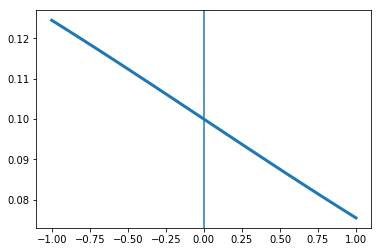

In [5]:
y = []

def logist(L,k,n):
    return (2*L)/(1+math.exp(k*(n)))

for i in np.linspace(-1,1,100):
    y.append(logist(0.1,0.5,i))

fig, ax = plt.subplots()
ax.plot(np.linspace(-1,1,100), y, linewidth=3)
ax.axvline(0)
plt.show()

In [6]:
# #Corruption deterrence model with Linear Theta_i function
# x = np.linspace(0,1,100)

# #clean the code to avoid multiple functions
# def alphaE(i,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
#     if gammaE0 - (thetaR)*R>1:
#         gammaE = 1
#     elif gammaE0 - (thetaR)*R<0:
#         gammaE = 0
#     else:
#         gammaE =gammaE0 - (thetaR)*R
#     if gammaB0 - (thetaR)*R>1:
#         gammaB = 1
#     elif gammaB0 - (thetaR)*R<0:
#         gammaB = 0
#     else:
#         gammaB =gammaB0 - (thetaR)*R
#     if omegaE0 - (thetaP)*P>1:
#         omegaE = 1
#     elif gammaE0 - (thetaP)*P<0:
#         omegaE = 0
#     else:
#         omegaE =omegaE0 - (thetaP)*P
#     if omegaB0 - (thetaP)*P>1:
#         omegaB = 1
#     elif gammaB0 - (thetaP)*P<0:
#         omegaB = 0
#     else:
#         omegaB =omegaB0 - (thetaP)*P
#     Gamma = (1-gammaE)*(1-gammaB)
#     B = (1-omegaE)*(1-omegaB)
#     p= (1-(P/2))
#     r = (1-(R/2))
#     return ((b - F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*pi + gammaE*gammaB*F*r)/
#                    ( -B*F*Gamma*i - B*Gamma*i*pi +B*Gamma*pi - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
#                      - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*pi))
     
# def alphaB(j,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
#     if gammaE0 - (thetaR)*R>1:
#         gammaE = 1
#     elif gammaE0 - (thetaR)*R<0:
#         gammaE = 0
#     else:
#         gammaE =gammaE0 - (thetaR)*R
#     if gammaB0 - (thetaR)*R>1:
#         gammaB = 1
#     elif gammaB0 - (thetaR)*R<0:
#         gammaB = 0
#     else:
#         gammaB =gammaB0 - (thetaR)*R
#     if omegaE0 - (thetaP)*P>1:
#         omegaE = 1
#     elif gammaE0 - (thetaP)*P<0:
#         omegaE = 0
#     else:
#         omegaE =omegaE0 - (thetaP)*P
#     if omegaB0 - (thetaP)*P>1:
#         omegaB = 1
#     elif gammaB0 - (thetaP)*P<0:
#         omegaB = 0
#     else:
#         omegaB =omegaB0 - (thetaP)*P    
#     Gamma = (1-gammaE)*(1-gammaB)
#     B = (1-omegaE)*(1-omegaB)
#     p= (1-(P/2))
#     r = (1-(R/2))
#     return ((- F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*b + gammaE*gammaB*F*r)/
#                    ( -B*F*Gamma*j - B*Gamma*j*pi +B*Gamma*b - F*Gamma*p*omegaE*omegaB + F*Gamma*P*omegaE*omegaB 
#                      - F*Gamma*P*omegaE + F*Gamma*omegaE*omegaB - F*Gamma*omegaB - Gamma*b))
    
# def plotting(b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP):
#     z = 1 if alphaE(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP).any()<0 else alphaE(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP) 
#     w = 1 if alphaB(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP).any()<0 else alphaB(x,b,F,pi,R,P,gammaE0,gammaB0,omegaE0,omegaB0,thetaR,thetaP)
#     fig, ax = plt.subplots()
#     ax.plot(x, z, linewidth=3)
#     ax.plot(x, w, linewidth=3)
#     fig.add_subplot(ax)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     fig.text(0.92, 0.05, '$β$')
#     fig.text(0.11, 0.9, '$𝛼$')
# #    How to fix?? color the area bellow the curve
#     ax.fill_between(x, z, facecolor='red', alpha=0.1)
#     ax.fill_between(x, w, z, facecolor='white')
#     plt.ylim([0, 1])
#     plt.xlim([0, 1])
#     plt.xticks(np.arange(0,1.1,0.1))
#     plt.yticks(np.arange(0,1.1,0.1))
#     plt.title('Indiference curves')
#     plt.legend(( 'ICE Wihtout Self-Reporting', 'ICB Wihtout Self-Reporting', 'Corruption Zone' ),
#                loc='upper right', shadow=True)
# #    fig.text(0.3, 0.15, 'Corruption')
# #   fig.text(0.6, 0.5, 'No Corruption')
#     plt.show()
    
# interactive_plot = interactive(plotting,b=(2,20,1),F=(2,40,1),pi=(4,40,1),R=(-1,1,0.01),P=(-1,1,0.010)
#                                ,gammaE0=(0.0001,1,0.010),gammaB0=(0.0001,1,0.010),omegaE0=(0.0001,1,0.010),omegaB0=(0.0001,1,0.010)
#                                ,thetaR=(0.0001,1,0.010),thetaP=(0.0001,1,0.010))
# interactive_plot

# #from ipywidgets.embed import embed_minimal_html, dependency_state
# #embed_minimal_html('export.html', views=interactive(plotting,b=(2,20,1),F=(2,40,1),pi=(4,40,1),R=(-1,1,0.01),P=(-1,1,0.010)
# #                              ,gammaE=(0,1,0.010),gammaB=(0,1,0.010),omegaE=(0,1,0.010),omegaB=(0,1,0.010)))

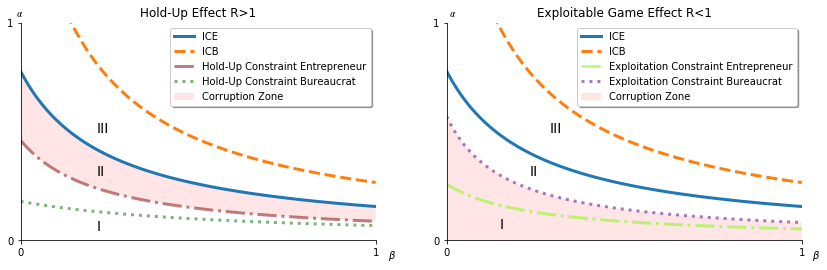

In [24]:
#Plotting examples for the article


z = alphaE(x,11,21,22,0.06,0,0.24,0.02,0.13,0.13,0,0) 
w = alphaB(x,11,21,22,0.06,0,0.24,0.02,0.13,0.13,0,0)
g = alphaE_HUR(x,0.06,0,0.24,0.02,0.13,0.13,0,0)
h = alphaB_HUR(x,0.06,0,0.24,0.02,0.13,0.13,0,0)
k = alphaE_CSR(x,11,21,22,-0.18,0,0.24,0.02,0.13,0.13,0,0)
l = alphaB_CSR(x,11,21,22,-0.18,0,0.24,0.02,0.13,0.13,0,0)
    
    
    
fig, ax =  plt.subplots(nrows=1, ncols=2,figsize=(14,4))
ax[0].plot(x, z, linewidth=3)
ax[0].plot(x, w, linewidth=3, linestyle='dashed')
ax[0].plot(x, g, linewidth=3,color='maroon',linestyle='-.', lw=3, alpha=0.5)
ax[0].plot(x, h, linewidth=3,color='darkgreen',linestyle=':', lw=3, alpha=0.5)

   
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
fig.text(0.49, 0.06, '$β$')
fig.text(0.12, 0.9, '$𝛼$')
ax[0].fill_between(x, z, g, facecolor='red', alpha=0.1)
ax[0].fill_between(x, g, facecolor='white')
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, 1])
ax[0].set_xticks(np.arange(0,1.1,1))
ax[0].set_yticks(np.arange(0,1.1,1))
ax[0].set_title('Hold-Up Effect R>1')
ax[0].legend(( 'ICE', 'ICB','Hold-Up Constraint Entrepreneur', 'Hold-Up Constraint Bureaucrat', 'Corruption Zone' ),loc='upper right', shadow=True)
#    fig.text(0.3, 0.15, 'Corruption')
#   fig.text(0.6, 0.5, 'No Corruption')

ax[1].plot(x, z, linewidth=3)
ax[1].plot(x, w, linewidth=3, linestyle='dashed')
ax[1].plot(x, k, linewidth=3,color='lawngreen',linestyle='-.', lw=3, alpha=0.5)
ax[1].plot(x, l, linewidth=3,color='indigo',linestyle=':', lw=3, alpha=0.5)
   
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
fig.text(0.91, 0.06, '$β$')
fig.text(0.55, 0.9, '$𝛼$')
ax[1].fill_between(x, l, facecolor='red', alpha=0.1)
#ax[1].fill_between(x, z, g, facecolor='red', alpha=0.1)
ax[1].set_ylim([0, 1])
ax[1].set_xlim([0, 1])
ax[1].set_xticks(np.arange(0,1.1,1))
ax[1].set_yticks(np.arange(0,1.1,1))
ax[1].set_title('Exploitable Game Effect R<1')
ax[1].legend(('ICE', 'ICB','Exploitation Constraint Entrepreneur', 'Exploitation Constraint Bureaucrat', 'Corruption Zone' ),loc='upper right', shadow=True)

fig.text(0.2, 0.16, 'I',fontsize=14)
fig.text(0.2, 0.35, 'II',fontsize=14)
fig.text(0.2, 0.5, 'III',fontsize=14)
fig.text(0.6, 0.165, 'I',fontsize=14)
fig.text(0.63, 0.35, 'II',fontsize=14)
fig.text(0.65, 0.5, 'III',fontsize=14)


plt.show()

fig.savefig('fig5.pdf')
